In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from merlion.utils import TimeSeries
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster

In [3]:
COLS = ["mean_swe", "mean_pr", "mean_tair", "mean_vs", "mean_srad", "mean_hum"]
data_path = "/Users/trop393/Documents/UW/FINAL/data/tests/model_ready_huc170103010101.csv"
df = pd.read_csv(data_path, index_col=0, parse_dates=True)

In [4]:
mean_swe = df["mean_swe"]

In [12]:
train_data = TimeSeries.from_pd(mean_swe[:-1000])
test_data = TimeSeries.from_pd(mean_swe[-1000:])

In [13]:
model = DefaultForecaster(DefaultForecasterConfig())
model.train(train_data=train_data)
test_pred, test_err = model.forecast(time_stamps=test_data.time_stamps)

Inferred granularity <Day>
/Users/trop393/miniconda3/envs/uw/lib/python3.11/site-packages/merlion/models/forecast/ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
/Users/trop393/miniconda3/envs/uw/lib/python3.11/site-packages/merlion/models/forecast/ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._last_val = train_data[-1]
/Users/trop393/miniconda3/envs/uw/lib/python3.11/site-packages/merlion/models/forecast/ets.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

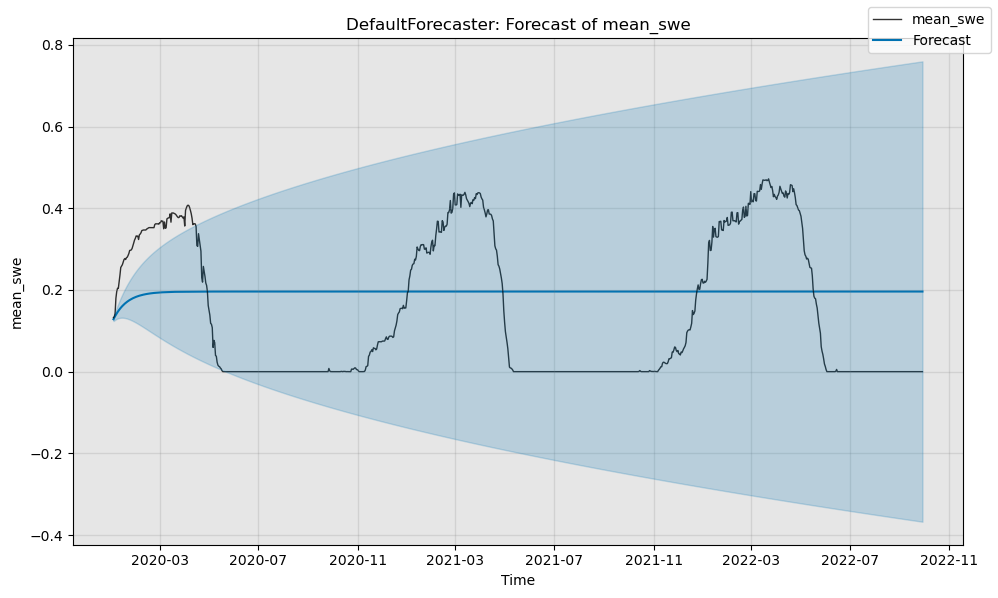

In [14]:
fig, ax = model.plot_forecast(time_series=test_data, plot_forecast_uncertainty=True)
plt.show()